In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [2]:
#시각화 관련 코드
!sudo apt-get install -y fonts-nanum #쥬피터 노트북을 쓰시는 경우 sudo 명령어 4줄은 주석처리하시면 됩니다 :) 전 코랩을 써서요!
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

import koreanize_matplotlib

from IPython.display import set_matplotlib_formats
plt.rc('font',family='NanumGothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [126]:
#Q1

age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

 

In [127]:
dict_age = df['연령대코드(5세단위)'].to_dict()     #연령대코드 칼럼(Series)을 딕셔너리로 변환
dict_age

{0: 13,
 1: 8,
 2: 8,
 3: 12,
 4: 8,
 5: 8,
 6: 8,
 7: 6,
 8: 8,
 9: 8,
 10: 17,
 11: 10,
 12: 9,
 13: 13,
 14: 10,
 15: 15,
 16: 5,
 17: 11,
 18: 8,
 19: 12,
 20: 11,
 21: 7,
 22: 9,
 23: 9,
 24: 8,
 25: 9,
 26: 12,
 27: 8,
 28: 7,
 29: 5,
 30: 10,
 31: 7,
 32: 9,
 33: 11,
 34: 5,
 35: 12,
 36: 14,
 37: 13,
 38: 8,
 39: 10,
 40: 12,
 41: 9,
 42: 13,
 43: 14,
 44: 10,
 45: 11,
 46: 10,
 47: 13,
 48: 13,
 49: 12,
 50: 13,
 51: 10,
 52: 11,
 53: 10,
 54: 13,
 55: 16,
 56: 6,
 57: 9,
 58: 9,
 59: 10,
 60: 15,
 61: 12,
 62: 5,
 63: 7,
 64: 13,
 65: 16,
 66: 9,
 67: 7,
 68: 10,
 69: 12,
 70: 7,
 71: 10,
 72: 6,
 73: 10,
 74: 8,
 75: 8,
 76: 7,
 77: 8,
 78: 9,
 79: 17,
 80: 11,
 81: 14,
 82: 13,
 83: 8,
 84: 12,
 85: 12,
 86: 9,
 87: 6,
 88: 8,
 89: 10,
 90: 8,
 91: 10,
 92: 7,
 93: 10,
 94: 8,
 95: 12,
 96: 7,
 97: 13,
 98: 6,
 99: 9,
 100: 12,
 101: 12,
 102: 13,
 103: 14,
 104: 13,
 105: 8,
 106: 11,
 107: 8,
 108: 15,
 109: 13,
 110: 9,
 111: 12,
 112: 7,
 113: 13,
 114: 15,
 115: 8,
 11

In [128]:
for key1, val1 in age_code.items():              #key1, val1은 각각 연령대코드와 해당 연령대의 문자열
  for key2, val2 in dict_age.items():            #key2, val2은 각각 연령대코드(Series)의 행 index와 연령대코드
    if val2 == key1:                             #연령대코드가 같으면
      dict_age[key2] = val1                      #연령대코드를 연령대의 문자열로 decoding
dict_age

{0: '60~64세',
 1: '35~39세',
 2: '35~39세',
 3: '55~59세',
 4: '35~39세',
 5: '35~39세',
 6: '35~39세',
 7: '25~29세',
 8: '35~39세',
 9: '35~39세',
 10: '80~84세',
 11: '45~49세',
 12: '40~44세',
 13: '60~64세',
 14: '45~49세',
 15: '70~74세',
 16: '20~24세',
 17: '50~54세',
 18: '35~39세',
 19: '55~59세',
 20: '50~54세',
 21: '30~34세',
 22: '40~44세',
 23: '40~44세',
 24: '35~39세',
 25: '40~44세',
 26: '55~59세',
 27: '35~39세',
 28: '30~34세',
 29: '20~24세',
 30: '45~49세',
 31: '30~34세',
 32: '40~44세',
 33: '50~54세',
 34: '20~24세',
 35: '55~59세',
 36: '65~69세',
 37: '60~64세',
 38: '35~39세',
 39: '45~49세',
 40: '55~59세',
 41: '40~44세',
 42: '60~64세',
 43: '65~69세',
 44: '45~49세',
 45: '50~54세',
 46: '45~49세',
 47: '60~64세',
 48: '60~64세',
 49: '55~59세',
 50: '60~64세',
 51: '45~49세',
 52: '50~54세',
 53: '45~49세',
 54: '60~64세',
 55: '75~79세',
 56: '25~29세',
 57: '40~44세',
 58: '40~44세',
 59: '45~49세',
 60: '70~74세',
 61: '55~59세',
 62: '20~24세',
 63: '30~34세',
 64: '60~64세',
 65: '75~79세',
 66: '40~44세',
 67: 

In [129]:
dict_age.values()                                #값들(연령대)만 가져옴
list(dict_age.values())                          #리스트화
df['연령대']=list(dict_age.values())             #'연령대' 칼럼을 새로 추가해줌
df['연령대']

0         60~64세
1         35~39세
2         35~39세
3         55~59세
4         35~39세
           ...  
999995    40~44세
999996    40~44세
999997    55~59세
999998    50~54세
999999    40~44세
Name: 연령대, Length: 1000000, dtype: object

In [130]:
df.groupby(['연령대'])['허리둘레'].describe()      #groupby를 통해 연령대를 기준으로 허리둘레의 통계값을 describe()으로 확인

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


min값과 max값을 보니 이해가 안되는 데이터가 섞여있다. 확인해보도록 한다.

In [131]:
df[df['허리둘레'] < 10]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대
411306,2017,411307,1,8,41,170.0,75.0,9.2,1.5,1.2,...,2.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126,35~39세
471952,2017,471953,2,11,47,155.0,45.0,6.5,0.8,0.8,...,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126,50~54세
931073,2017,931074,2,13,48,NaN,NaN,0.0,1.0,1.0,...,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126,60~64세


위의 두 데이터는 소수점을 잘못 표기한 것으로 보이므로 값을 수정하고, 맨 아래의 데이터는 결측값이므로 인덱스 번호를 전달해 drop해준다.

In [132]:
df.loc[411306, '허리둘레'] = 92
df.loc[471952, '허리둘레'] = 65
df.drop(931073, inplace=True)                                                   #dropna를 사용해도 되지만 결측값이 한개만 관찰되므로 직접 인덱스를 넘겨 drop해준다.
df[df['허리둘레'] < 10]


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대


허리둘레가 300cm보다 큰 데이터들도 노이즈데이터로 간주하고 제거해준다.

In [133]:
drop_index = df[df['허리둘레'] > 300].index.tolist()
df.drop(drop_index, inplace=True)
df[df['허리둘레'] > 300]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대


다시 통계를 내본다.

In [134]:
df.groupby(['연령대'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23243.0,75.112473,10.648424,47.5,67.5,73.4,81.0,149.0
25~29세,64886.0,77.534399,11.096445,48.0,69.0,76.5,84.2,150.0
30~34세,77480.0,80.650927,11.231649,49.0,72.0,80.1,88.0,150.0
35~39세,84611.0,81.986623,10.558374,48.0,75.0,82.0,89.0,146.0
40~44세,130910.0,80.474275,10.189171,42.1,73.0,80.0,87.0,165.4
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.063204,9.093193,50.8,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106490.0,82.723546,8.592478,27.0,77.0,83.0,88.0,137.0


데이터가 100만개인 것에 비해 노이즈데이터는 66개밖에 안돼서 평균값엔 소수점 아래로 둘째자리에만 영향을 미쳤으나 표준편차에는 유의미한 값의 변화가 있었다.

한김에 성별코드도 성별로 디코딩해주자

In [135]:
sex = df['성별코드'].tolist()

def int_to_str(n):
  return '남자' if n == 1 else '여자'

sex_decoded = list(map(int_to_str, sex))                                           #map함수 적용
sex_decoded

['남자',
 '여자',
 '남자',
 '여자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '남자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '여자',
 '남자',
 '여자',
 '여자',
 '남자',
 '여자',
 '남자',
 '남자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '남자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '남자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '여자',
 '남자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '남자',
 '남자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '남자',
 '남자',
 '남자',
 '여자',
 '여자',
 '여자',
 '여자',
 '여자',
 '남자',
 '여자',
 '남자',

In [136]:
df['성별'] = sex_decoded                            #성별 칼럼 만들어주기


In [137]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '연령대', '성별'],
      dtype='object')

대한 비만학회에 따르면 허리둘레로 측정한 복부 비만의 기준은 성인 남자에서는 90 cm 이상, 여자에서는 85 cm이상일 때 복부비만으로 진단한다고 한다. 연령대와 성별 별로 복부 비만율을 구해보자

In [138]:
series_total_count = df.groupby(['연령대','성별'])['허리둘레'].count()        #전체 count
series_total_count

연령대     성별
20~24세  남자    10013
        여자    13230
25~29세  남자    35021
        여자    29865
30~34세  남자    48774
        여자    28706
35~39세  남자    57787
        여자    26824
40~44세  남자    70423
        여자    60487
45~49세  남자    63888
        여자    54469
50~54세  남자    65126
        여자    64707
55~59세  남자    56788
        여자    55387
60~64세  남자    51747
        여자    54743
65~69세  남자    26912
        여자    26712
70~74세  남자    24482
        여자    27104
75~79세  남자    11775
        여자    14197
80~84세  남자     6922
        여자     9283
85세+    남자     1444
        여자     2680
Name: 허리둘레, dtype: int64

In [139]:
df_man_fat = df[(df['성별'] == '남자') & (df['허리둘레'] >= 90)]
df_woman_fat = df[(df['성별'] == '여자') & (df['허리둘레'] >= 85)]
df_fat = pd.concat([df_man_fat, df_woman_fat])

series_fat_count = df_fat.groupby(['연령대','성별'])['허리둘레'].count()
series_fat_count

연령대     성별
20~24세  남자     1619
        여자     1060
25~29세  남자     7646
        여자     2204
30~34세  남자    14027
        여자     3065
35~39세  남자    17178
        여자     3292
40~44세  남자    19848
        여자     7976
45~49세  남자    17016
        여자     7831
50~54세  남자    17178
        여자    11090
55~59세  남자    15231
        여자    11762
60~64세  남자    15140
        여자    14862
65~69세  남자     8058
        여자     9059
70~74세  남자     7849
        여자    10398
75~79세  남자     3882
        여자     5815
80~84세  남자     2154
        여자     3791
85세+    남자      355
        여자      895
Name: 허리둘레, dtype: int64

In [140]:
(series_fat_count / series_total_count).round(2)*100       

연령대     성별
20~24세  남자    16.0
        여자     8.0
25~29세  남자    22.0
        여자     7.0
30~34세  남자    29.0
        여자    11.0
35~39세  남자    30.0
        여자    12.0
40~44세  남자    28.0
        여자    13.0
45~49세  남자    27.0
        여자    14.0
50~54세  남자    26.0
        여자    17.0
55~59세  남자    27.0
        여자    21.0
60~64세  남자    29.0
        여자    27.0
65~69세  남자    30.0
        여자    34.0
70~74세  남자    32.0
        여자    38.0
75~79세  남자    33.0
        여자    41.0
80~84세  남자    31.0
        여자    41.0
85세+    남자    25.0
        여자    33.0
Name: 허리둘레, dtype: float64

20~64세까지는 남자 복부비만율이 여자 복부비만율보다 높으나, 65세부터는 역전이 일어나는 것을 확인해볼 수 있다.
이는 유의미한 데이터라고 생각된다. 또한 나이가 들수록 남자 여자를 가리지 않고 복부비만율이 증가하는 모습도 확인해볼 수 있다.

In [141]:
#Q2
columns = ['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']                               #상관계수를 확인할 칼럼들
df_small = df[columns]
df_small.columns

Index(['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드'], dtype='object')

In [142]:
df_corr = df_small.corr()                           #상관계수 matrix 생성
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.351993,-0.283388,-0.368593
흡연상태,0.351993,1.000000,-0.125770,-0.588477
연령대코드(5세단위),-0.283388,-0.125770,1.000000,0.080178
성별코드,-0.368593,-0.588477,0.080178,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


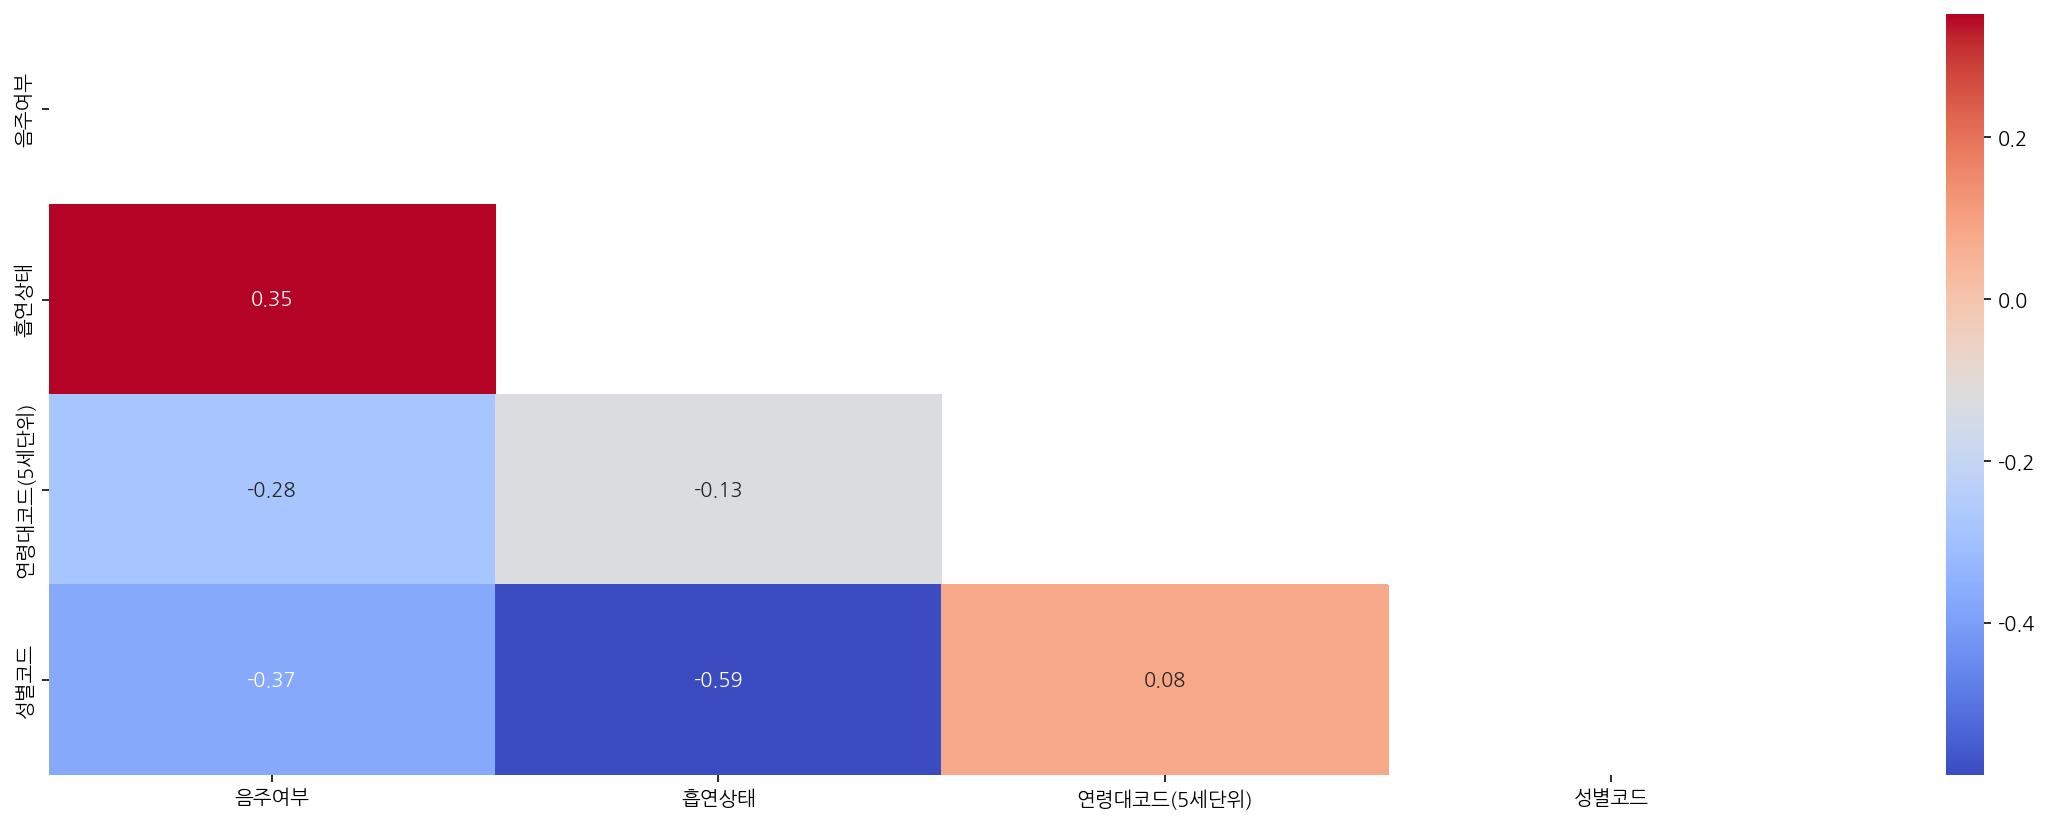

In [150]:
mask = np.triu(np.ones_like(df_corr,dtype=np.bool))               #diagonal matrix만 보기

plt.figure(figsize=(20,7))  
sns.heatmap(df_corr, annot=True,fmt='.2f',cmap='coolwarm',mask=mask)

heatmap으로부터 음주여부와 흡연여부는 뚜렷한 양의 상관관계를 가지는 것을 확인할 수 있다. 성별코드와 흡연상태는 뚜렷한 음의 상관관계를 가진다. 이는 성별코드가 1:남자 2:여자 이고 흡연하는 상태에 가까울 수록 흡연상태의 값이 커지므로 성별코드가 감소하는 방향으로 흡연상태가 증가하는 것을 의미하며 남자가 흡연을 더 많이 한다는 것을 의미한다. 음주여부도 마찬가지로 해석할 수 있다.
연령대코드와 음주여부, 흡연상태는 약한 음의 상관관계를 가진다. 어릴수록 음주, 흡연을 많이 한다는 것을 의미한다. 연령대코드와 성별코드의 상관관계는 그렇게 큰 의미를 가지진 않을 것 같다.

In [161]:
#Q3
smoke = {1:"흡연안함", 2:"끊음", 3:"흡연중"}
drink = {0:"안마심", 1:"마심"}

smoke_incoding = {val:key for key, val in smoke.items()}                 #상관계수를 구하기 위해선 정수인코딩 값이 필요하므로 다시 코드로 되돌리기 위한 딕셔너리를 생성
drink_incoding = {val:key for key, val in drink.items()}

{'흡연안함': 1, '끊음': 2, '흡연중': 3}

In [163]:
df['흡연상태'].replace(smoke, inplace=True)          #replace를 통해 코드를 문자열로 변환
df['음주여부'].replace(drink, inplace=True)          

In [164]:
df_smoke_and_drink = pd.crosstab(df['음주여부'], df['흡연상태'])            #crosstab에 인자로 index, column 넘김
df_smoke_and_drink

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213740,162166
안마심,55330,394446,52845


In [173]:
df_smoke_and_drink['흡연중'].sum()               #흡연하는 사람의 수

215011

In [175]:
df_smoke_and_drink.loc['마심'].sum()              #음주를 하는 사람의 수

496685

음주를 하는 사람 수가 흡연자의 수보다 두 배 이상 많은 것을 확인해 볼 수 있다.

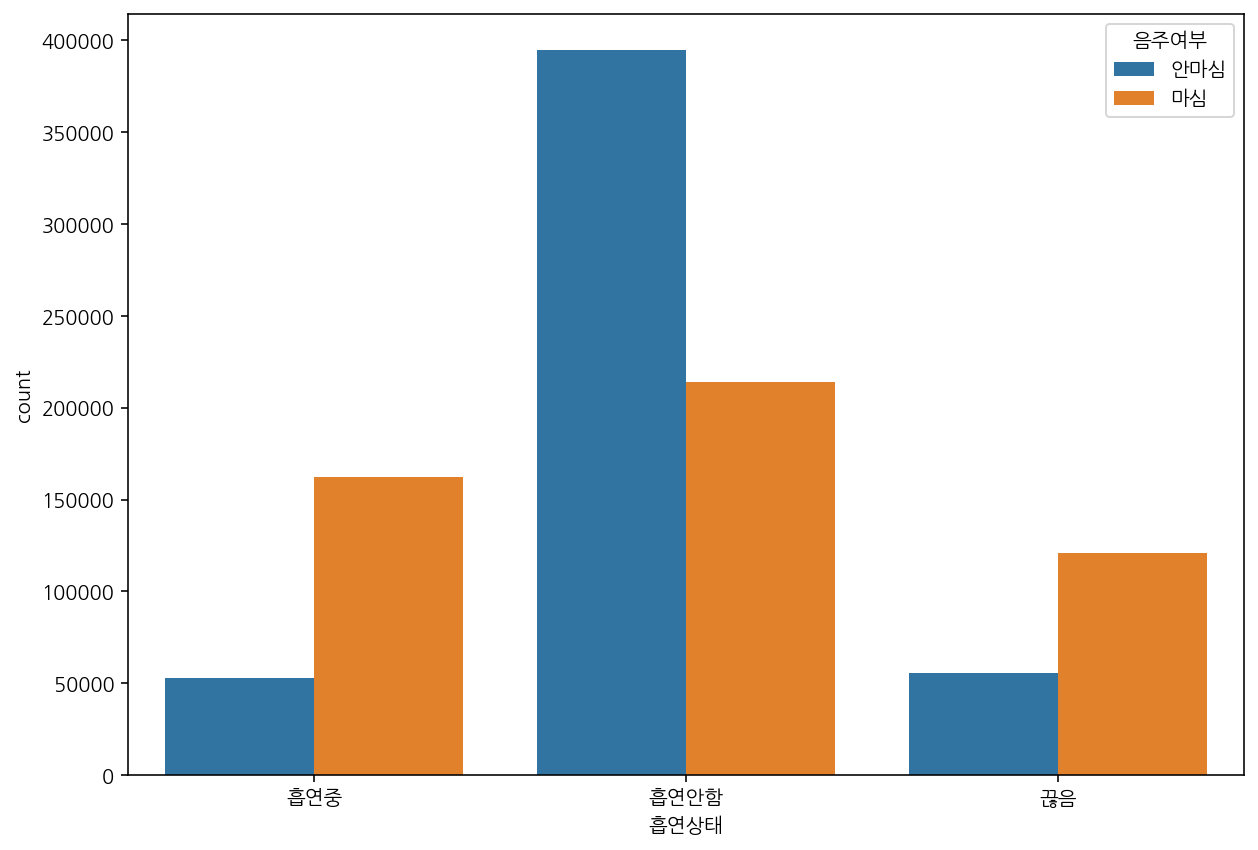

In [170]:
plt.figure(figsize=(10,7))
sns.countplot(x="흡연상태", data=df, hue="음주여부")

흡연을 한 번이라도 해본 사람들은 거의 음주를 하는 것으로 해석해볼 수 있으며 흡연을 안하면 음주도 대부분 안하는 경우가 많은 것으로 해석해볼 수 있다. 하지만 음주와 흡연은 연령대별로, 성별 별로 편차가 크므로 좋은 데이터는 아닌 것으로 생각된다. 

<Figure size 1800x1080 with 0 Axes>

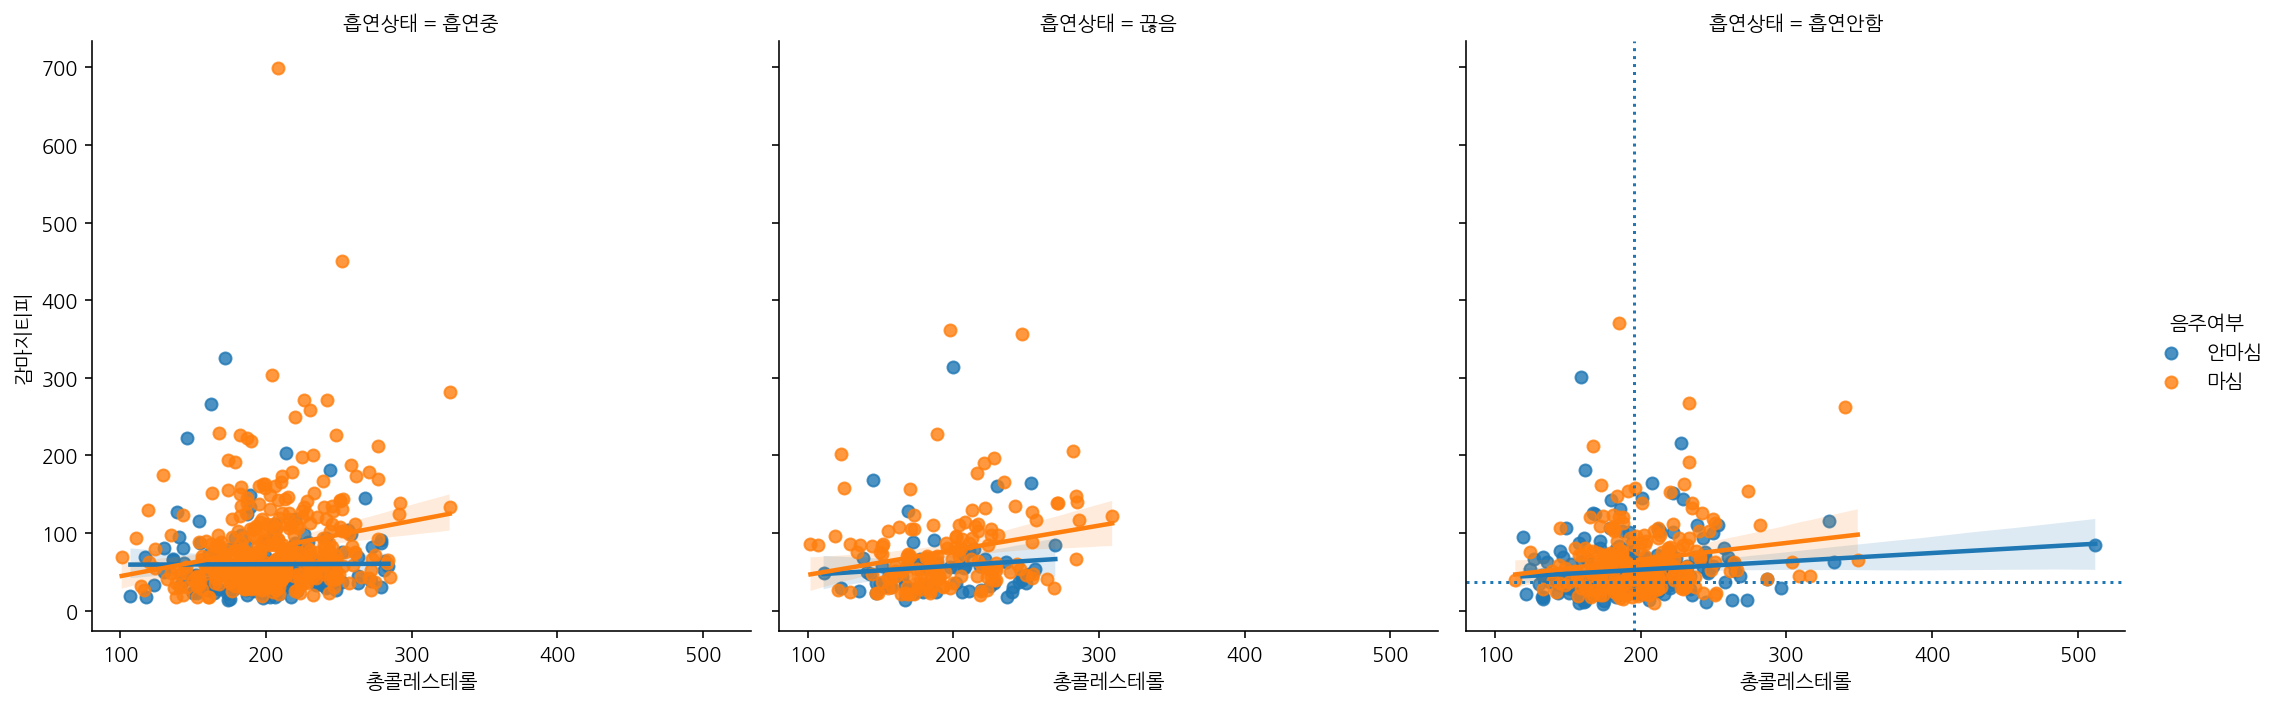

In [213]:
#Q4
df_over_120 = df[df['체중(5Kg 단위)'] >= 120]

plt.figure(figsize=(25,15))
sns.lmplot(data=df_over_120, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태' )
plt.axhline(df['감마지티피'].mean(), linestyle=":")
plt.axvline(df['총콜레스테롤'].mean(), linestyle=":")


120kg 이상의 비만인 사람은 흡연, 음주 여부에 관계없이 총콜레스테롤, 감마지티피 값이 평균값보다 높게 나타나는 것으로 보인다. 이 데이터를 이용해 비만인 사람들에게 건강관리를 설득하는 목적으로 사용될 수 있을 것이라고 생각된다.

In [207]:
#Q5
left_drop_index = df[df['시력(좌)'] == 9.9].index.tolist()                      #시력이 9.9인 데이터의 인덱스를 저장하고 drop
right_drop_index = df[df['시력(우)'] == 9.9].index.tolist()

df.drop(left_drop_index)
df.drop(right_drop_index)


,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,연령대,성별,흡연상태문자열,음주여부문자열


In [219]:
sorted_age = df['연령대'].sort_values()                      #연령대를 오름차순으로 정렬

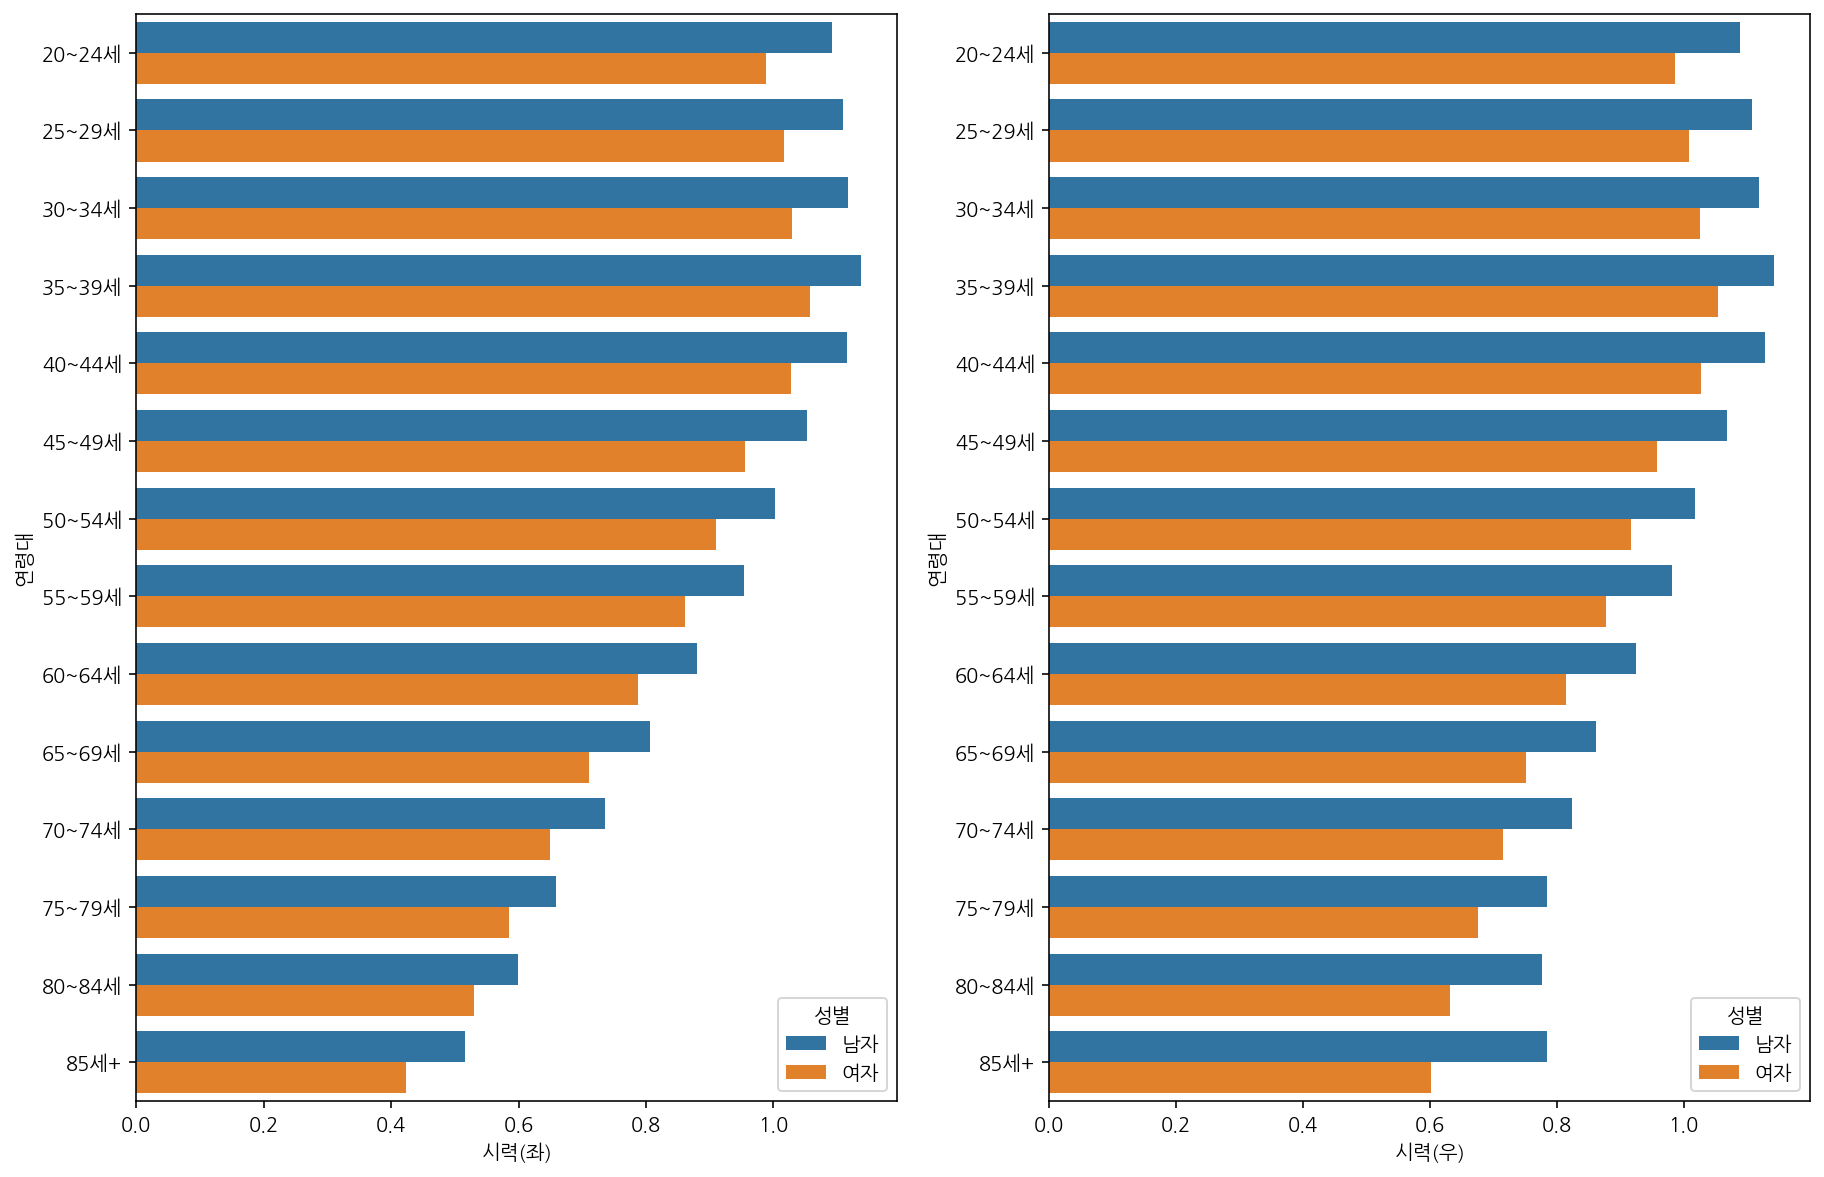

In [220]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(data=df, x='시력(좌)', y=sorted_age, hue='성별', ci=None)

plt.subplot(1,2,2)
sns.barplot(data=df, x='시력(우)', y=sorted_age, hue='성별', ci=None)

연령대가 높아질수록 시력이 낮아지는 경향을 보였고 특히 남자보다 여자에게서 연령증가에 따른 시력저하가 두드러지는 모습을 확인할 수 있다. 이 데이터를 통해 안경점의 주 고객층이 여성, 노인이 될 것으로 예상할 수 있고 이에 따라 주 고객에 맞는 서비스와 물품을 제공할 수 있을 것이다.